Text(0, 0.5, 'y(m)')

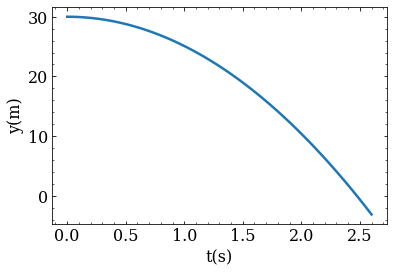

In [280]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
plt.style.use('29S22.mplstyle')
t = np.linspace(0, 2.6, 100)
y = 30 - 0.5 * 9.8 * t**2
plt.plot(t,y)
plt.xlabel('t(s)')
plt.ylabel('y(m)')

Text(0, 0.5, 'N(x)')

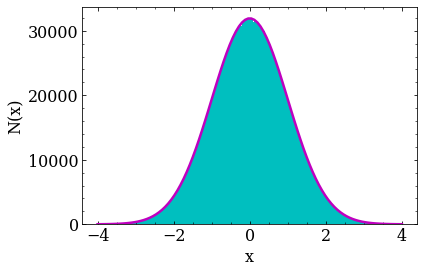

In [281]:
x = np.random.randn(int(1e7))
plt.hist(x,bins=int(1e3),range=(-4,4), color='c')
xx = np.linspace(-4,4,100)
yy = np.exp(-0.5*xx**2)/np.sqrt(2*np.pi)*1.e7/1.e3*(4-(-4))
plt.plot(xx,yy,color='m')
plt.xlabel('x')
plt.ylabel('N(x)')

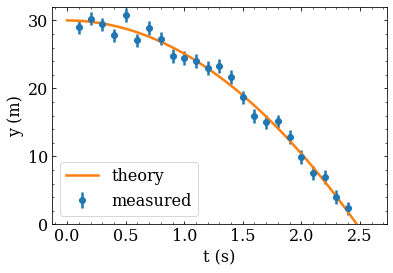

In [282]:
tmeas = np.linspace(0.1, 2.4, 24)
err = np.random.randn(24)
ymeas = 30-0.5*9.8*tmeas**2+err
plt.errorbar(tmeas,ymeas,yerr=1,linestyle=' ',marker='o',label='measured')
plt.plot(t, y,label='theory')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.ylim(0.,32.)
plt.legend(loc='lower left')

In [283]:
def gauss(x):
    return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)
integrate.quad(gauss,-1,1)

(0.682689492137086, 7.579375928402476e-15)

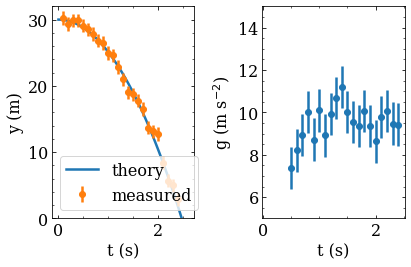

In [284]:
tmeas = np.linspace(0.1, 2.4, 24)
err = np.random.randn(24)
ymeas = 30-0.5*9.8*tmeas**2+err
yerr = np.zeros(24)+1
gmeas = 2*(30-ymeas)/tmeas**2
gerr = 2*1/(tmeas**2)
plt.subplot(1,2,1)
plt.plot(t, y, label='theory')
plt.errorbar(tmeas,ymeas,yerr=1, linestyle=' ', marker='o', label='measured')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.ylim(0.,32.)
plt.legend(loc='lower left')
plt.subplot(1,2,2)
plt.errorbar(tmeas, gmeas, yerr=1, linestyle=' ', marker='o')
plt.xlabel('t (s)')
plt.ylabel('g (m s$^{-2}$)')
plt.ylim(5,15.)
plt.tight_layout()
plt.show()

In [285]:
gmean = np.average(gmeas, weights=1/gerr**2)
print(gmean)
gmeanerr = np.sqrt(1/np.sum(1/gerr**2))
print(gmeanerr)

9.594302311278414
0.1506264969906393


In [286]:
from scipy import special
xpts=np.linspace(-10,5,20)
aipts, aippts, bipts, bippts = special.airy(xpts)
np.savetxt('HW8data.txt', np.transpose([xpts, aipts]))

In [287]:
data = np.loadtxt('HW8data.txt')
x = data[:,0]
f = data[:,1]

csv files

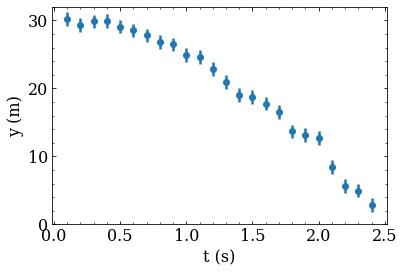

In [288]:
np.savetxt('Week10freefalldata.txt', np.transpose([tmeas, ymeas, yerr]))
plt.errorbar(tmeas, ymeas, yerr, linestyle=' ', marker='o')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.ylim(0.,32.)
plt.show()

In [289]:
data = np.loadtxt('Week10freefalldata.txt')
np.savetxt('Week10freefalldata.csv', data, delimiter=',')

In [290]:
np.savez('Week10freefalldata', tmeas=tmeas, ymeas=ymeas, yerr=yerr)
data = np.load('Week10freefalldata.npz')
print(data.files)

['tmeas', 'ymeas', 'yerr']


In [291]:
print(data['tmeas'])

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4]


Fitting a model to experimental data
$y(t) = y_0+{v_0}_yt-\frac{1}{2}gt^2$
$\Chi^2 = \Sigma\frac{(data-model)^2}{error^2}$

In [292]:
from scipy import optimize

In [293]:
def model(t, y0, vy0, g):
    return y0+vy0*t-0.5*g*t**2

In [294]:
bestpar, covariance = optimize.curve_fit(model, tmeas, ymeas, sigma=yerr)
print('y0={}\nvy0={}\ng={}\n'.format(bestpar[0],bestpar[1],bestpar[2]))
print('covariance matrix\n', covariance)

y0=30.489721198989955
vy0=-1.031267414905234
g=8.813622244677118

covariance matrix
 [[ 0.22733623 -0.3709037  -0.25231543]
 [-0.3709037   0.7722405   0.58226637]
 [-0.25231543  0.58226637  0.46581309]]


In [295]:
ymodbest=model(tmeas,bestpar[0],bestpar[1],bestpar[2])
yexact=model(tmeas,30.,0.,9.8)
diffbest=(ymeas-ymodbest)**2/yerr**2
diffexact=(ymeas-yexact)**2/yerr**2
chisqbest=np.sum(diffbest)
chisqexact=np.sum(diffexact)
print('best fit chi squared =',chisqbest)
print('exact model chi squared =',chisqexact)

best fit chi squared = 10.724416985735614
exact model chi squared = 13.292950061278272


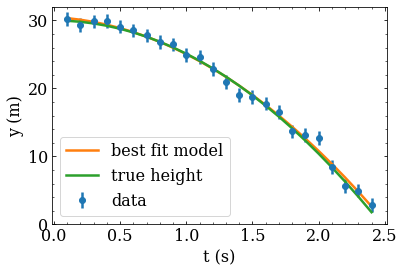

In [296]:
plt.errorbar(tmeas,ymeas,yerr,linestyle=' ',marker='o',label='data')
plt.plot(tmeas,ymodbest,label='best fit model')
plt.plot(tmeas,yexact,label='true height')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.ylim(0.,32.)
plt.legend()
plt.show()

In [297]:
print(bestpar)
print(np.sqrt(covariance[0,0]),np.sqrt(covariance[1,1]),np.sqrt(covariance[2,2]))

[30.4897212  -1.03126741  8.81362224]
0.47679788782371957 0.8787721554720529 0.682505014132663


Reduced $\Chi^2$
$\Chi^2_\nu = \frac{\Chi^2}{\nu^2}$
$\nu$ = number of data $\minus$ number of parameter

In [298]:
print('reduced best fit chi squared =',chisqbest/(24-3))
print('reduced exact model chi squared =',chisqexact/(24-3))

reduced best fit chi squared = 0.5106865231302673
reduced exact model chi squared = 0.632997621965632


New model:$y(t) = y_0+{v_0}_yt-\alpha \exp(t^2)$

In [303]:
def badmodel(t, y0, vy0, alpha):
    return y0+vy0*t-alpha*np.exp(t**2)
bestpar,covariance=optimize.curve_fit(badmodel,tmeas,ymeas,sigma=yerr)
print('best fit parameters\n y0, vy0, alpha =\n',bestpar)
ybadmod=badmodel(tmeas,bestpar[0],bestpar[1],bestpar[2])
diffbad=(ymeas-ybadmod)**2/yerr**2
chisqbad=np.sum(diffbad)
print('\nchi squared for best model =',chisqbest)
print('chi squared for bad model =',chisqbad)
print('reduced chi squared for best model =',chisqbest/(24-3))
print('reduced chi squared for bad model =',chisqbad/(24-3))

best fit parameters
 y0, vy0, alpha =
 [ 3.37988719e+01 -1.00466387e+01  2.71284424e-02]

chi squared for best model = 10.724416985735614
chi squared for bad model = 43.751841492720274
reduced chi squared for best model = 0.5106865231302673
reduced chi squared for bad model = 2.0834210234628703


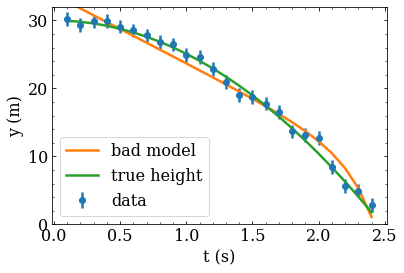

In [300]:
plt.errorbar(tmeas,ymeas,yerr,linestyle=' ',marker='o',label='data')
plt.plot(tmeas,ybadmod,label='bad model')
plt.plot(tmeas,yexact,label='true height')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.ylim(0.,32.)
plt.legend()
plt.show()